NAME -> ASIF ALI

REG NO. ->PIET18CS025

SET NO. ->6

In [6]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#  read the CSV file and look at the first five rows of the data:
dataset = pd.read_csv('/content/NLP dataset2.csv - NLP dataset2.csv.csv', nrows=1000)
pd.read_excel
dataset.head()

,text,class
0,Now all @Apple has to do is get swype on the i...,1
1,@Apple will be adding more carrier support to ...,1
2,Hilarious @youtube video - guy does a duet wit...,1
3,@RIM you made it too easy for me to switch to ...,1
4,I just realized that the reason I got into twi...,1


In [9]:
print(dataset)

                                                  text  class
0    Now all @Apple has to do is get swype on the i...      1
1    @Apple will be adding more carrier support to ...      1
2    Hilarious @youtube video - guy does a duet wit...      1
3    @RIM you made it too easy for me to switch to ...      1
4    I just realized that the reason I got into twi...      1
..                                                 ...    ...
474  Houston we have a problem!! My iPad has been r...      0
475  #Siri went down for a little while last night....      0
476  @ford should have teamed up with @Apple instea...      0
477  RT @gdcurry: Really @Apple?  What have you don...      0
478                                DAMN YOU !!! @apple      0

[479 rows x 2 columns]


In [10]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(479, 2)


In [11]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    479 non-null    object
 1   class   479 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


In [12]:
#Data types of Columns
types = dataset.dtypes
print(types)

text     object
class     int64
dtype: object


In [13]:
#Count total number of classes in Data
class_counts = dataset.groupby('class').size()
print(class_counts)

class
0    316
1    163
dtype: int64


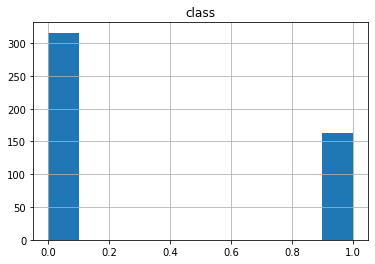

In [14]:
# Histogram plot
from matplotlib import pyplot
dataset.hist()
pyplot.show()

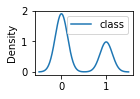

In [15]:
#Density Plot - representation of distribution of numerical values 
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [16]:
#Finding missing values
dataset.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
# Let us take text to understand process of data preprocessing in NLP
text="Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is"

In [19]:
print(dataset["text"][0])

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is


In [20]:
# First step: cleaning Text and removing number and punctuation marks.
import re
review = re.sub('[^a-zA-Z]', ' ', dataset['text'][0])
print(text)
print('-------------------------------------------------')
print('Review after removing number and punctuation marks. ')
print(review)

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
-------------------------------------------------
Review after removing number and punctuation marks. 
Now all  Apple has to do is get swype on the iphone and it will be crack  Iphone that is


In [21]:
# Second  step: converting text into lower case.
review=review.lower()
print(text)
print('-------------------------------------------------')
print('Text after convering into lower case')
print(review)

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
-------------------------------------------------
Text after convering into lower case
now all  apple has to do is get swype on the iphone and it will be crack  iphone that is


In [22]:
# Third step: Removing stop words like 'this, the'
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
review = review.split()
print(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['now', 'all', 'apple', 'has', 'to', 'do', 'is', 'get', 'swype', 'on', 'the', 'iphone', 'and', 'it', 'will', 'be', 'crack', 'iphone', 'that', 'is']


In [23]:
# Third step: Removing stop words like 'this, the'
# set function is generally used for long article to fastem process
review1 = [word for word in review if not word in set(stopwords.words('english'))]
print('Text after removing stop words')
print(review1)

Text after removing stop words
['apple', 'get', 'swype', 'iphone', 'crack', 'iphone']


In [24]:
# Fourth step: converting stemming words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
print('After converting stemmer words')
print(review)

After converting stemmer words
['appl', 'get', 'swype', 'iphon', 'crack', 'iphon']


In [25]:
# joining these words of list
review2 = ' '.join(review)

print(review2)

appl get swype iphon crack iphon


In [26]:
# Creating the Bag of Words model
corpus1 = []
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(review2)
corpus1.append(review2)
print(corpus1)
X = cv.fit_transform(corpus1)
print(X)

appl get swype iphon crack iphon
['appl get swype iphon crack iphon']
  (0, 0)	1
  (0, 2)	1
  (0, 4)	1
  (0, 3)	2
  (0, 1)	1


In [27]:
# Cleaning the texts for all review using for loop
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 479):
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    print(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
appl get swype iphon crack iphon
appl ad carrier support iphon announc
hilari youtub video guy duet appl siri pretti much sum love affair http co exbnqji
rim made easi switch appl iphon see ya
realiz reason got twitter io thank appl
current blackberri user littl bit disappoint move android appl iphon
strangest thing siri said far sooo glad appl gave siri sens humor http co twaeudbp via happyplac
great close person event appl tonight regent st store
compani experi best custom servic asid zappo appl
appli job appl hope call lol
rt jamaicanidl lmao think appl onto someth magic die haha siri suggest find whore h
lmao think appl onto someth magic die haha siri suggest find whore hide bodi lolol
rt philliprowntre regist appl develop hope actual help greatli appreci
wow great deal refurb ipad first gen model rt appl offer great deal refurbish st gen ipad http co ukwokbgd appl

In [28]:
print(corpus)

['appl get swype iphon crack iphon', 'appl ad carrier support iphon announc', 'hilari youtub video guy duet appl siri pretti much sum love affair http co exbnqji', 'rim made easi switch appl iphon see ya', 'realiz reason got twitter io thank appl', 'current blackberri user littl bit disappoint move android appl iphon', 'strangest thing siri said far sooo glad appl gave siri sens humor http co twaeudbp via happyplac', 'great close person event appl tonight regent st store', 'compani experi best custom servic asid zappo appl', 'appli job appl hope call lol', 'rt jamaicanidl lmao think appl onto someth magic die haha siri suggest find whore h', 'lmao think appl onto someth magic die haha siri suggest find whore hide bodi lolol', 'rt philliprowntre regist appl develop hope actual help greatli appreci', 'wow great deal refurb ipad first gen model rt appl offer great deal refurbish st gen ipad http co ukwokbgd appl', 'regist appl develop hope actual help greatli appreci', 'current learn mand

In [29]:
#    Adding corpus to csv 
corpus_dataset = pd.DataFrame(corpus)
corpus_dataset['corpus'] = corpus_dataset
corpus_dataset = corpus_dataset.drop([0], axis = 1) 
corpus_dataset.to_csv('/content/NLP dataset 1.csv')

In [30]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(cv)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [31]:
print(X)
print(X.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(479, 1500)


In [32]:
print(y)
print(y.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(479,)


In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [34]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[60  7]
 [ 7 22]]


In [37]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 85.42


In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.2f' % (precision*100))

Precision: 75.86


In [39]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.2f' % (score*100))

F-Measure: 75.86


In [40]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.2f' % (recall*100))

Recall: 75.86


In [41]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifier) 
  
# Load the pickled model 
model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0])

In [42]:
# save the model to disk
import joblib
filename = '/content/NLP dataset2.csv - NLP dataset2.csv.csv'
joblib.dump(classifier, filename)
 
# some time later...
 
# load the model from disk
naive_bayes_model = joblib.load(filename)
result = naive_bayes_model.score(X_test, y_test)
print(result)

0.8541666666666666


In [43]:
Review = "very good" #@param {type:"string"}
input_data = [Review] 
  
input_data = cv.transform(input_data).toarray()
print(input_data)

input_pred = classifier.predict(input_data)

input_pred = input_pred.astype(int)


if input_pred[0]==1:
    print("Review is Positive")
else:
    print("Review is Negative")

[[0 0 0 ... 0 0 0]]
Review is Positive
